In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

counter = 1 

# Lists
lat = []
temp = [] 
humidity = []
cloud = []
wind = []
confirmed_cities = []

print("Beginning Data Retrival")
print("---------------------------------------------------------------------------------------------------")

#Loop and error handling (Try-except-else block explaination: I store the data as a variable first then only append the value to the list if the city has valid information)
for city in cities:
    city_url = url + "&q=" + city
    #print(counter)
    print(f'Processing City #{counter} --- {city}')
    print(city_url)
    counter = counter + 1 
    try:
        response = requests.get(url + city).json()
        lat_value = response['coord']['lat']
        temp_value = response['main']['temp_max']
        humidity_value = response['main']['humidity']
        cloud_value = response['clouds']['all']
        wind_value = response['wind']['speed']
    except:
        continue
    else:
        confirmed_cities.append(city)
        lat.append(lat_value)
        temp.append(temp_value)
        humidity.append(humidity_value)
        cloud.append(cloud_value)
        wind.append(wind_value)

        
# Using dict and making a dataframe
weather_dict = {
    "City": confirmed_cities,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


Beginning Data Retrival
------------------------------------------------
Processing City #1 --- kant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=kant
Processing City #2 --- grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=grand river south east
Processing City #3 --- haimen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=haimen
Processing City #4 --- tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=tasiilaq
Processing City #5 --- severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=severo-kurilsk
Processing City #6 --- ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=ola
Processing City #7 --- buta

Processing City #56 --- hurghada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=hurghada
Processing City #57 --- aurdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=aurdal
Processing City #58 --- belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=belushya guba
Processing City #59 --- mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=mount isa
Processing City #60 --- nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=nikolskoye
Processing City #61 --- hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=hamilton
Processing City #62 --- hengshui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing City #112 --- constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=constitucion
Processing City #113 --- neman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=neman
Processing City #114 --- bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=bluff
Processing City #115 --- broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=broome
Processing City #116 --- pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=pevek
Processing City #117 --- norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=norman wells
Processing City #118 --- qibili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a11

Processing City #169 --- leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=leningradskiy
Processing City #170 --- grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=grand gaube
Processing City #171 --- pajapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=pajapan
Processing City #172 --- fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=fort-shevchenko
Processing City #173 --- sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=sioux lookout
Processing City #174 --- saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=saldanha
Processing City #175 --- mocuba
http://api.openweathermap.org/data/2

Processing City #225 --- sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=sola
Processing City #226 --- tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=tateyama
Processing City #227 --- banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=banda aceh
Processing City #228 --- veraval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=veraval
Processing City #229 --- petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=petropavlovsk-kamchatskiy
Processing City #230 --- yanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=yanan
Processing City #231 --- bengkulu
http://api.openweathermap.org/data/2.5/weather?uni

Processing City #281 --- coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=coahuayana
Processing City #282 --- longview
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=longview
Processing City #283 --- kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=kangaatsiaq
Processing City #284 --- padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=padang
Processing City #285 --- puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=puerto escondido
Processing City #286 --- port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=port lincoln
Processing City #287 --- polunochnoye
http://api.openweathermap.org/data/2.5

Processing City #337 --- arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=arraial do cabo
Processing City #338 --- teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=teya
Processing City #339 --- flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=flinders
Processing City #340 --- vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=vila franca do campo
Processing City #341 --- henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=henties bay
Processing City #342 --- ouadda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=ouadda
Processing City #343 --- rungata
http://api.openweathermap.org/data/2.5/we

Processing City #392 --- wampusirpi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=wampusirpi
Processing City #393 --- smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=smithers
Processing City #394 --- fort saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=fort saint john
Processing City #395 --- asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=asyut
Processing City #396 --- udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=udachnyy
Processing City #397 --- narbonne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=narbonne
Processing City #398 --- karpathos
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing City #448 --- yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=yulara
Processing City #449 --- lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=lethem
Processing City #450 --- high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=high level
Processing City #451 --- bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=bakchar
Processing City #452 --- natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=natal
Processing City #453 --- mineiros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=mineiros
Processing City #454 --- glen allen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199

Processing City #505 --- kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=kavaratti
Processing City #506 --- superior
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=superior
Processing City #507 --- praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=praia
Processing City #508 --- betioky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=betioky
Processing City #509 --- shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=shingu
Processing City #510 --- paragominas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=paragominas
Processing City #511 --- vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1

Processing City #561 --- egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=egvekinot
Processing City #562 --- ampanihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=ampanihy
Processing City #563 --- noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=noumea
Processing City #564 --- shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=shelburne
Processing City #565 --- codo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=codo
Processing City #566 --- khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=khash
Processing City #567 --- mugur-aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a119921

Processing City #617 --- manjeshwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=manjeshwar
Processing City #618 --- ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc6fa41e4a1199212e019b3616149869&q=&q=ayan


,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,kant,42.89,32.71,84,24,1.48
1,haimen,31.87,63.31,100,0,3.71
2,tasiilaq,65.61,33.80,86,92,21.92
3,severo-kurilsk,50.68,44.68,100,12,3.94
4,ola,59.58,42.80,100,90,3.15


In [4]:
weather_data.to_csv("output_data/cities_data",index = False, header = True )

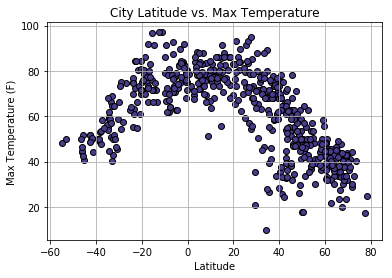

In [5]:
# Max Temperature VS. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], marker="o", facecolors="darkslateblue",edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

## Save the figure and show the plot
plt.savefig("output_data/Temperature vs Latitude.png")
plt.show()

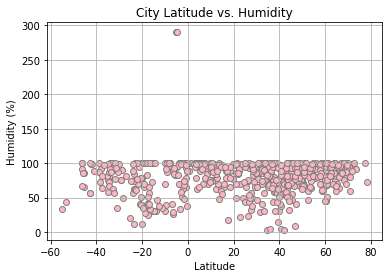

In [6]:
# Humidity VS. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o", facecolors="lightpink",edgecolors="grey")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

## Save the figure and show the plot
plt.savefig("output_data/Humidity vs Latitude.png")
plt.show()

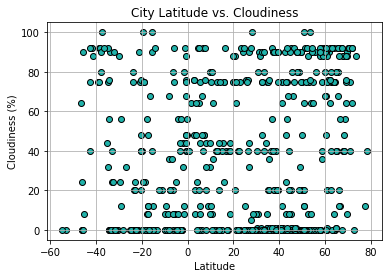

In [7]:
# Cloudiness VS. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o", facecolors="lightseagreen",edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

## Save the figure and show the plot
plt.savefig("output_data/Cloudiness vs Latitude.png")
plt.show()

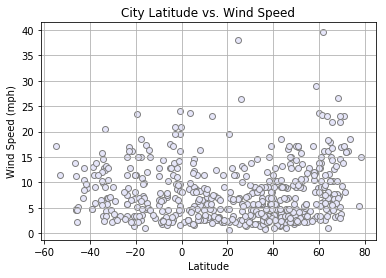

In [8]:
# Wind Speed VS. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o", facecolors="lavender",edgecolors="grey")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

## Save the figure and show the plot
plt.savefig("output_data/Wind Speed vs Latitude.png")
plt.show()

# Observable Trends
1. There is not an obviously correlation between the wind speed and laittude of the city.
2. After running the entire notebook for several time, the plots seems to look similar even with a different list of cities within the same range of latitude and longitude 
3. Temperature appears to be higher as the location is closer to the equator 